<a href="https://colab.research.google.com/github/Swapna2635/Exploratory-Data-Analysis/blob/main/week4_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



# Load the Titanic dataset

titanic_data = sns.load_dataset('titanic')



# Preview the first few rows

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Basic Information
print(titanic_data.info())
print(titanic_data.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
          survived      pclass   sex         age       sibsp       parch  

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


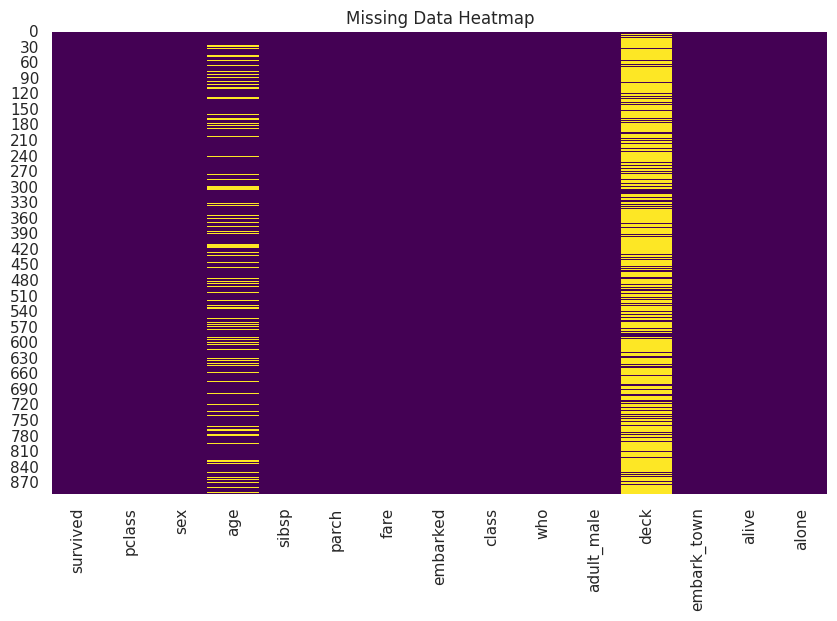

In [8]:
# Missing Values
print(titanic_data.isnull().sum())
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

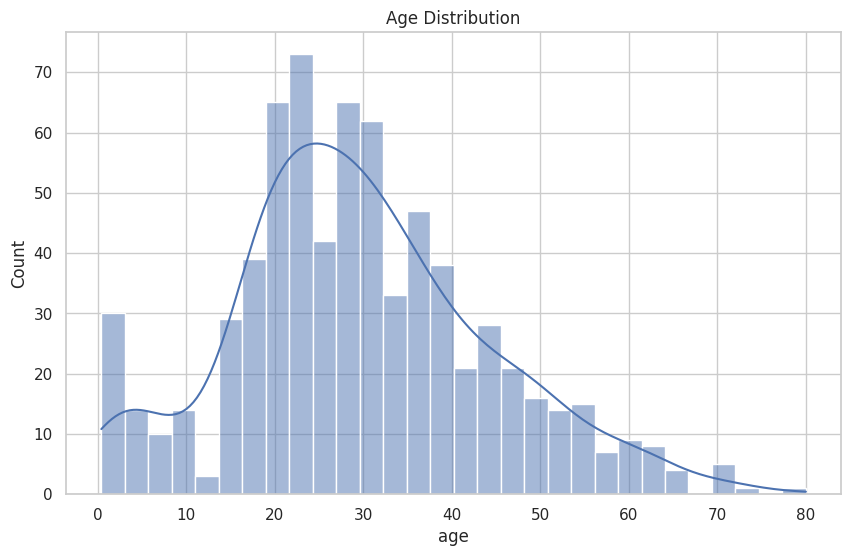

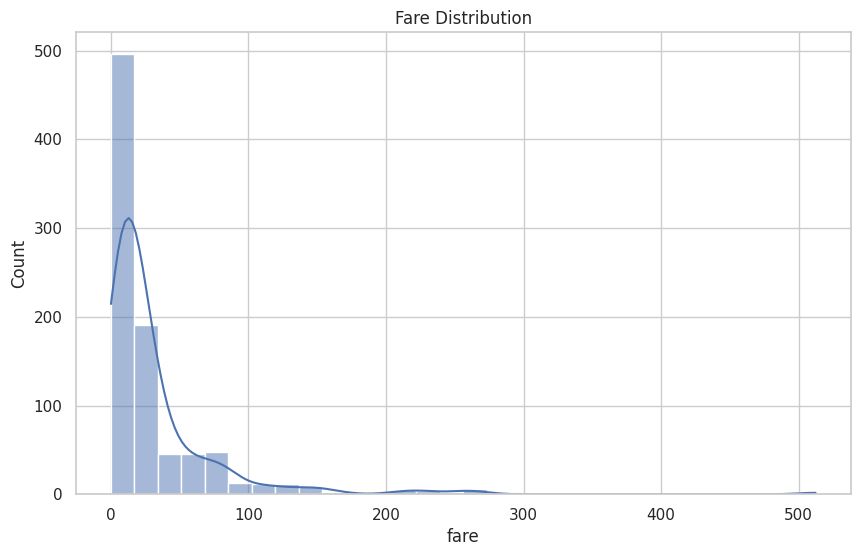

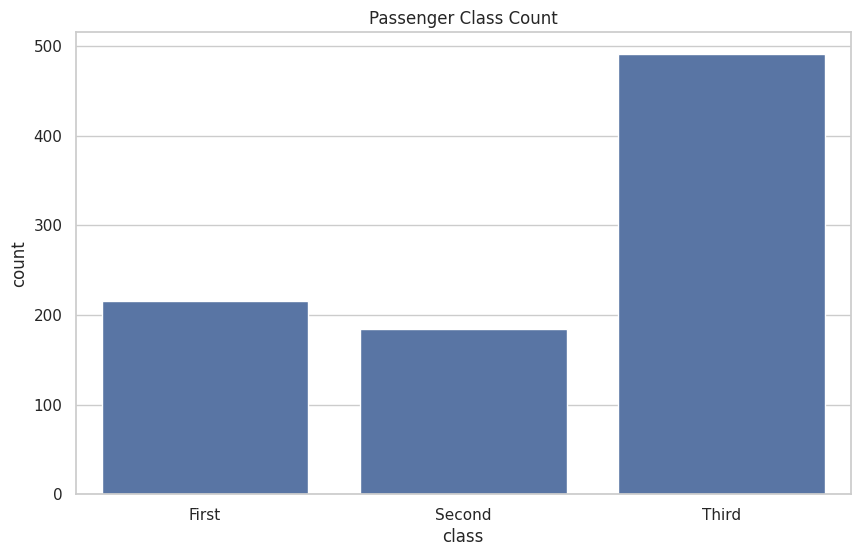

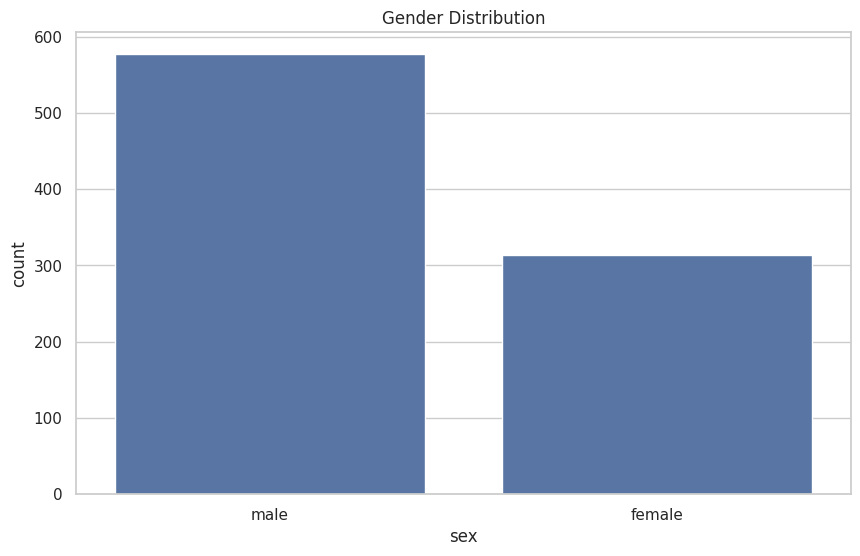

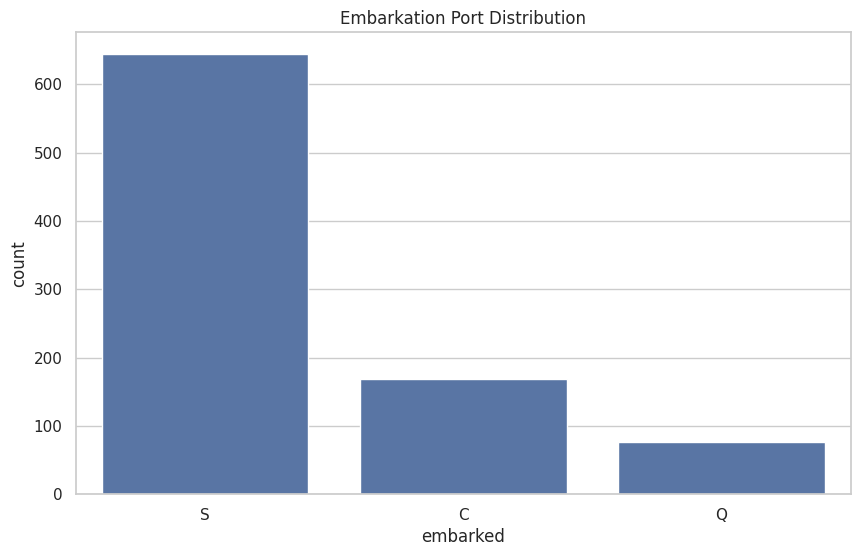

In [10]:
# Univariate Analysis
sns.histplot(titanic_data['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

sns.histplot(titanic_data['fare'].dropna(), kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

sns.countplot(x='class', data=titanic_data)
plt.title('Passenger Class Count')
plt.show()

sns.countplot(x='sex', data=titanic_data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='embarked', data=titanic_data)
plt.title('Embarkation Port Distribution')
plt.show()

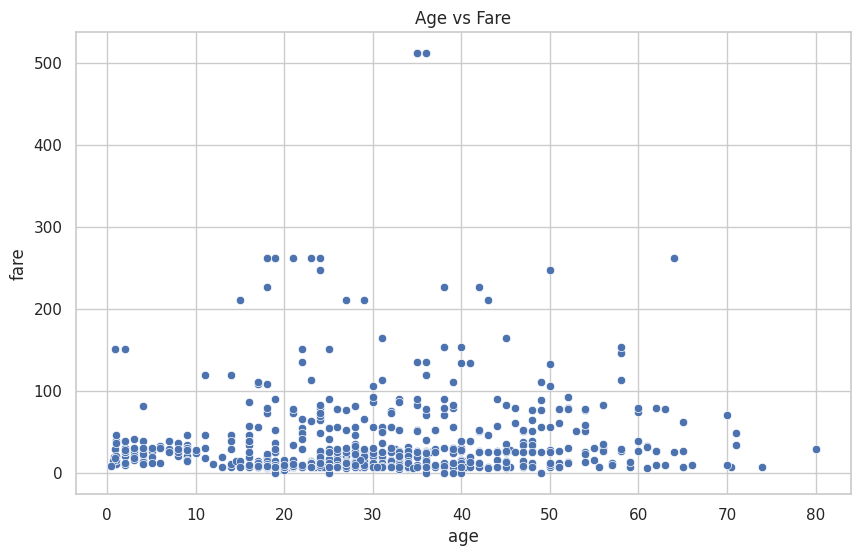

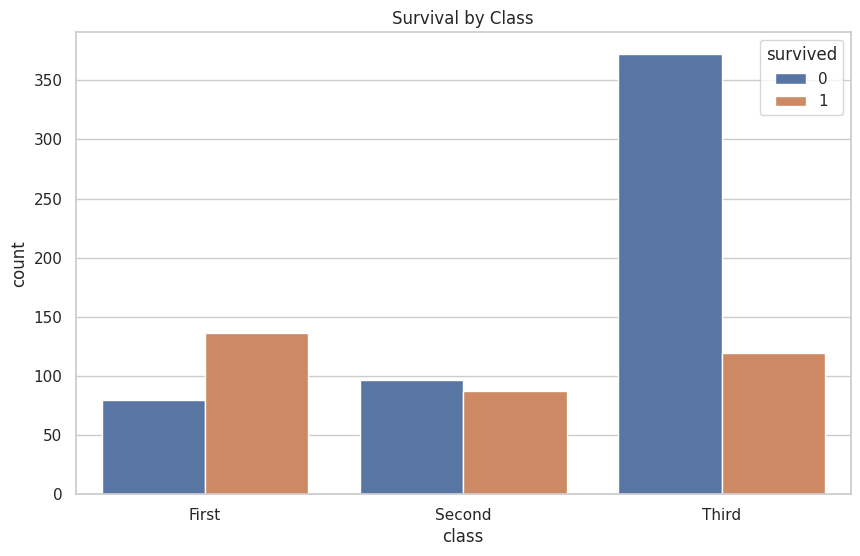

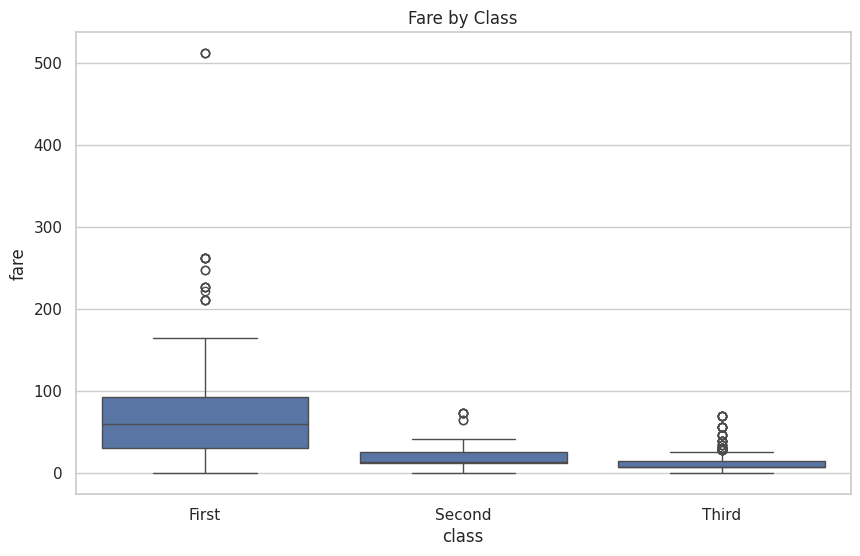

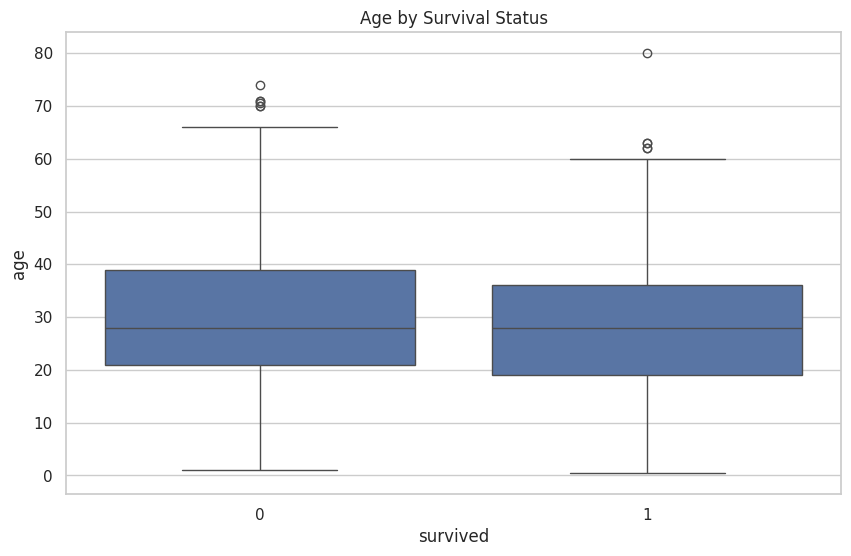

ValueError: could not convert string to float: 'male'

In [11]:
# Bivariate Analysis
sns.scatterplot(x='age', y='fare', data=titanic_data)
plt.title('Age vs Fare')
plt.show()

sns.countplot(x='class', hue='survived', data=titanic_data)
plt.title('Survival by Class')
plt.show()

sns.boxplot(x='class', y='fare', data=titanic_data)
plt.title('Fare by Class')
plt.show()

sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age by Survival Status')
plt.show()

corr = titanic_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


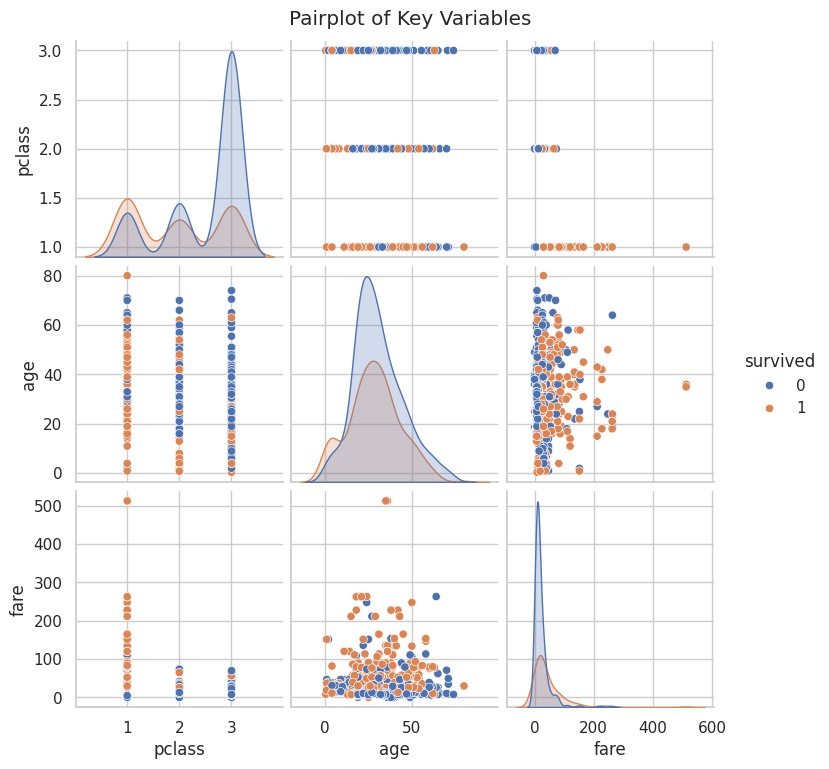

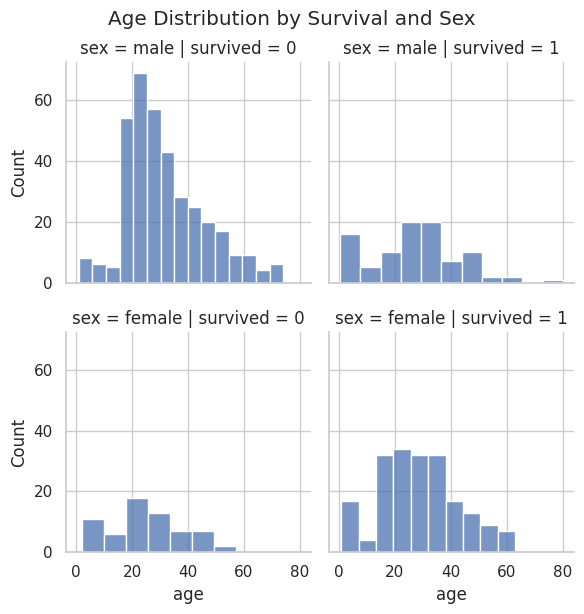

In [12]:
# Multivariate Analysis
sns.pairplot(titanic_data[['survived', 'pclass', 'age', 'fare']], hue='survived')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

g = sns.FacetGrid(titanic_data, col='survived', row='sex')
g.map_dataframe(sns.histplot, x='age')
g.fig.suptitle('Age Distribution by Survival and Sex', y=1.02)
plt.show()


In [13]:
# Fill missing Age with median
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)

/tmp/ipython-input-13-660704688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)


In [14]:
# Fill missing embarked with mode
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-14-3238062183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)


In [15]:
# Fill missing embark_town with mode
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)


/tmp/ipython-input-15-4056129474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)


In [16]:

# Final Missing Check
print(titanic_data.isnull().sum())


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64
